#  <span style="color:red">DATA SET</span>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.model_selection import train_test_split

%matplotlib inline

In [22]:
df_train_X = pd.read_csv('df_train_x_nona.csv')
df_train_Y = pd.read_csv('train_Y_5fzj9UT.csv')

In [23]:
df_train_Y.head()

,ID,value
0,0,48.0
1,1,50.0
2,2,62.0
3,3,67.0
4,4,75.0


In [24]:
df_train_X.head()

,ID,station_id,hdres_100,hdres_500,ldres_100,ldres_500,industry_100,industry_500,urbgreen_100,urbgreen_500,...,value_0,value_1,value_2,value_3,value_4,value_5,value_6,value_7,value_8,value_9
0,0,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,53.0,46.0,52.0,44.0,40.0,38.0,54.0,36.0,39.0,42.0
1,1,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,55.0,47.0,54.0,45.0,41.0,39.0,55.0,37.0,40.0,43.0
2,2,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,84.5,54.0,78.0,49.0,47.0,42.0,63.0,42.0,48.0,49.0
3,3,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,97.0,59.0,84.0,55.0,58.0,48.0,72.0,51.0,57.0,59.0
4,4,105,0.0,0.0,1.0,0.929,0.0,0.033,0.0,0.022,...,99.0,67.0,95.0,63.0,67.0,48.0,82.0,59.0,64.0,65.0


#  <span style="color:black">INPUT FEATURES</span>

In [ ]:
#'station_id','hdres_100','hdres_500','ldres_100','ldres_500','industry_100','industry_500','urbgreen_100','urbgreen_500','roads_length_25','roads_length_100','roads_length_500','major_roads_length_25','major_roads_length_100','major_roads_length_500'
X=df_train_X[['station_id','hdres_100','hdres_500','ldres_100','ldres_500','industry_100','industry_500','urbgreen_100','urbgreen_500','roads_length_25','roads_length_100','roads_length_500','major_roads_length_25','major_roads_length_100','major_roads_length_500','value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']]
y=df_train_Y['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

#  <span style="color:red">LINEAR REGRESSION</span>

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
# print the intercept
print(lm.intercept_)

-0.2064618788985868


In [28]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
station_id,-0.004159
hdres_100,-1.540626
hdres_500,-1.985937
ldres_100,-2.280301
ldres_500,-1.105521
industry_100,-3.810802
industry_500,-0.329440
urbgreen_100,3.148439
urbgreen_500,-4.553037
roads_length_25,-1.200148


In [29]:
lm_predictions = lm.predict(X_test)

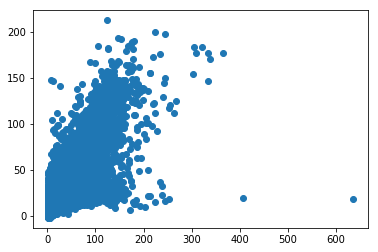

In [30]:
plt.scatter(y_test,lm_predictions)

In [31]:
from sklearn import metrics

In [32]:
print('MAE:', metrics.mean_absolute_error(y_test, lm_predictions))
print('MSE:', metrics.mean_squared_error(y_test, lm_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lm_predictions)))

MAE: 5.895404587598737
MSE: 92.05888959498219
RMSE: 9.594732387877329


# <span style="color:red">GRADIENT BOOSTING REGRESSOR</span>

In [33]:
from sklearn import ensemble
params = {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2,
          'learning_rate': 0.01, 'loss': 'ls'}
gradient_boost_model = ensemble.GradientBoostingRegressor(**params)

In [34]:
gradient_boost_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=4, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=50, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [41]:
gb_predictions = gradient_boost_model.predict(X_test)
mse = mean_squared_error(y_test, gb_predictions)
print("MSE: %.4f" % mse)

mse_log = mean_squared_log_error(y_test, gb_predictions)
print("MSE_log: %.4f" % mse_log)

MSE: 169.4512
MSE_log: 0.2794


In [42]:
# y_test.head()

# <span style="color:red">DECISION TREE REGRESSOR</span>

In [43]:
from sklearn.tree import DecisionTreeRegressor
dt_R = DecisionTreeRegressor()
dt_R.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [44]:
dt_predictions = dt_R.predict(X_test)

In [45]:
y_test.head()

68865     18.0
209841    15.3
260495    18.1
562992    36.0
295934    52.0
Name: value, dtype: float64

In [56]:
mse = mean_squared_error(y_test, dt_predictions)
print("MSE: %.4f" % mse)

mse_log = mean_squared_log_error(y_test, dt_predictions)
print("MSE_log: %.4f" % mse_log)

MSE: 115.8290
MSE_log: 0.1516


In [47]:
# dt_R.score()

# <span style="color:red">RANDOM FOREST</span>

In [48]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
rf_predictions = rf.predict(X_test)

In [57]:
mse = mean_squared_error(y_test, rf_predictions)
print("MSE: %.4f" % mse)

mse_log = mean_squared_log_error(y_test, rf_predictions)
print("MSE_log: %.4f" % mse_log)

MSE: 59.1350
MSE_log: 0.0851


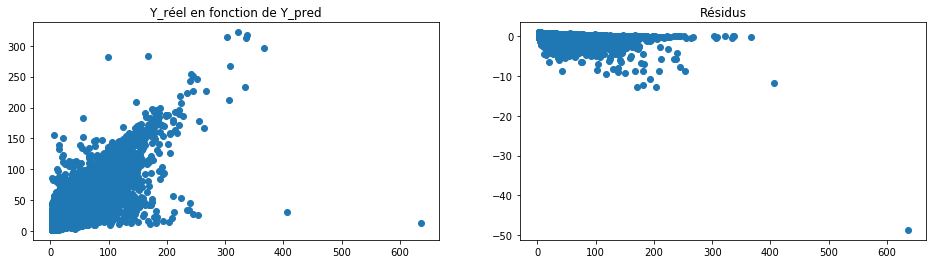

In [58]:
plt.figure(figsize=(16,4))

plt.subplot(1,2,1)
plt.title('Y_réel en fonction de Y_pred')
plt.scatter(y_test,rf_predictions)

plt.subplot(1,2,2)
plt.title('Résidus')
plt.scatter(y_test,(rf_predictions-y_test)/rf_predictions)

In [52]:
importances = list(rf.feature_importances_)

In [53]:
feature_list = ['station_id','hdres_100','hdres_500','ldres_100','ldres_500','industry_100','industry_500','urbgreen_100','urbgreen_500','roads_length_25','roads_length_100','roads_length_500','major_roads_length_25','major_roads_length_100','major_roads_length_500','value_0','value_1','value_2','value_3','value_4','value_5','value_6','value_7','value_8','value_9']

In [54]:
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

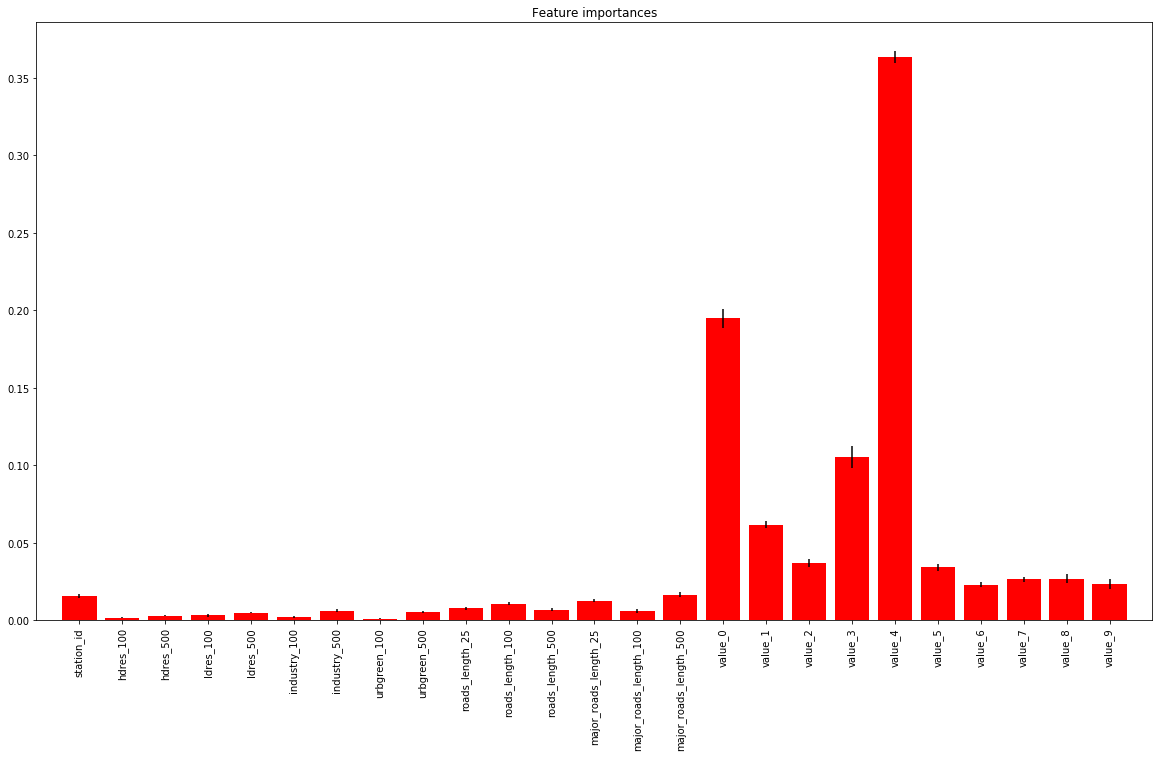

In [55]:
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)

# Plot the feature importances of the forest
plt.figure(figsize=(20,11))
plt.title("Feature importances")
plt.bar(range(len(feature_list)), importances,
       color="r", yerr=std[range(len(feature_list))], align="center")
plt.xticks(range(len(feature_list)), feature_list, rotation='vertical')
plt.xlim([-1, len(feature_list)])
plt.show()

# <span style="color:green">RESULTS</span>